# Case Study : Stock Price Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Remove Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
stock = pd.read_csv("ADANIPORTS.csv")
stock

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


In [3]:
# data cloning
df = stock
df.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [4]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.0,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.0,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.0,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.2,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942
3321,2021-04-30,ADANIPORTS,EQ,746.75,739.0,759.45,724.50,726.4,730.05,743.35,12600934,9.366911e+14,132141.0,3514692,0.2789


In [5]:
df.shape

(3322, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [7]:
# Parsing the date
df.Date = pd.to_datetime(df.Date)

In [8]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800


In [9]:
# No of days between

print(f"Dataframe contains stock price between {df.Date.min()} - {df.Date.max()}")
print(f"Total Days = {(df.Date.max()) - (df.Date.min()) }")

Dataframe contains stock price between 2007-11-27 00:00:00 - 2021-04-30 00:00:00
Total Days = 4903 days 00:00:00


`Insight`

- 

# EDA and Visualization

In [10]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

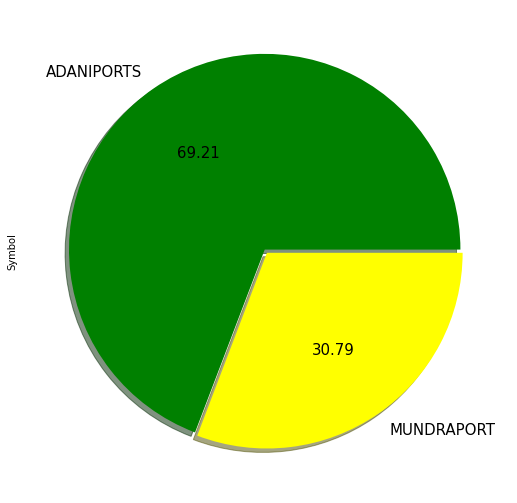

In [11]:
plt.rcParams["figure.figsize"] = (16,9)
df.Symbol.value_counts().plot.pie(shadow=True, autopct="%0.2f",colors=["g","yellow"],explode=[0.01,0.01], textprops={"size":15})
plt.show()

In [12]:
df.head(2)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.0,770.0,1050.0,770.0,959.0,962.9,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.9,984.0,990.0,874.0,885.0,893.9,941.38,4581338,4.312765e+14,NaN,1453278,0.3172


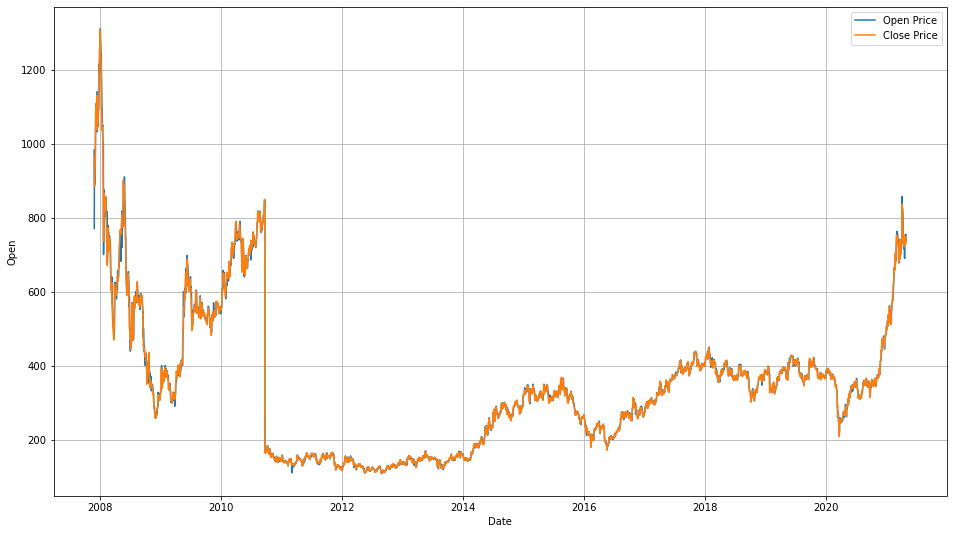

In [13]:
sns.lineplot(df.Date, df.Open)
sns.lineplot(df.Date, df.Close)
plt.legend(["Open Price","Close Price"])
plt.grid()
plt.show()

<AxesSubplot:>

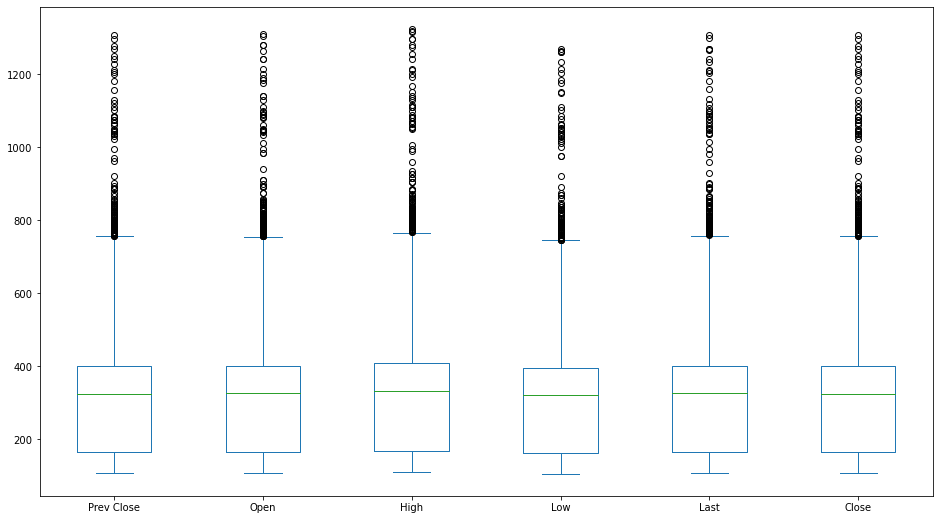

In [14]:
df[["Prev Close","Open","High","Low","Last","Close"]].plot(kind="box")

<AxesSubplot:xlabel='Prev Close', ylabel='Count'>

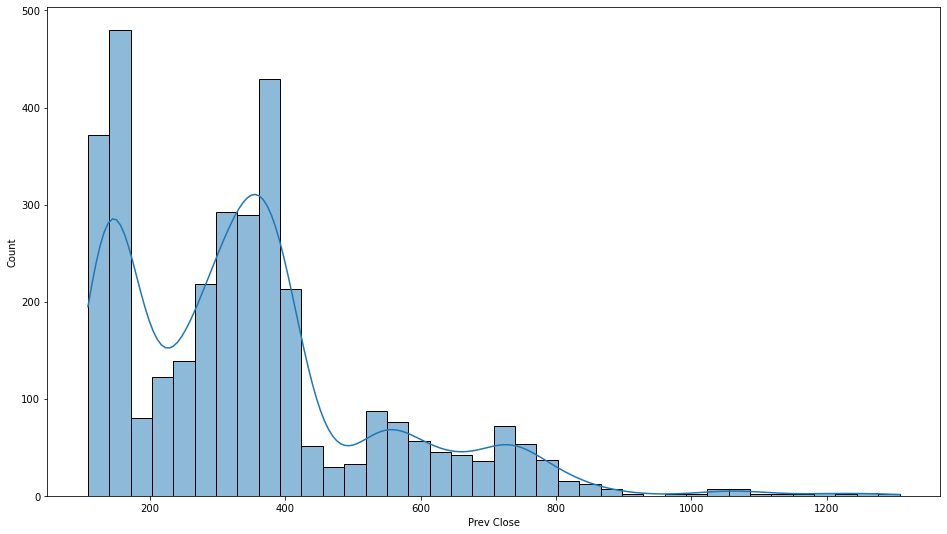

In [15]:
sns.histplot(df["Prev Close"],kde=True)

In [16]:
df.head(2)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.0,770.0,1050.0,770.0,959.0,962.9,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.9,984.0,990.0,874.0,885.0,893.9,941.38,4581338,4.312765e+14,NaN,1453278,0.3172


# Data Cleaning and Data Handling

 **We don't need some columns so we are eleminating these columns**

- Symbols, Series, Trades

In [17]:
df = df[["Date","Prev Close","Open","High","Low","Last","Close","VWAP","Volume"]]
df

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume
0,2007-11-27,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366
1,2007-11-28,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338
2,2007-11-29,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121
3,2007-11-30,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762
4,2007-12-03,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470
...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549
3318,2021-04-27,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107
3319,2021-04-28,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977
3320,2021-04-29,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910


In [18]:
# Missing value checking
df.isna().sum()

Date          0
Prev Close    0
Open          0
High          0
Low           0
Last          0
Close         0
VWAP          0
Volume        0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3322 non-null   datetime64[ns]
 1   Prev Close  3322 non-null   float64       
 2   Open        3322 non-null   float64       
 3   High        3322 non-null   float64       
 4   Low         3322 non-null   float64       
 5   Last        3322 non-null   float64       
 6   Close       3322 non-null   float64       
 7   VWAP        3322 non-null   float64       
 8   Volume      3322 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 233.7 KB


#  Building Linear Models

In [20]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error as mse ,r2_score

- We want to predict stock prices. Our target variable is "Close". Beacuse We want to know at what price stock will close.

In [34]:
X = df[["Prev Close","Open","High","Low","Last","VWAP","Volume"]]
X.head(2)

,Prev Close,Open,High,Low,Last,VWAP,Volume
0,440.0,770.0,1050.0,770.0,959.0,984.72,27294366
1,962.9,984.0,990.0,874.0,885.0,941.38,4581338


In [35]:
y = df.Close
y

0       962.90
1       893.90
2       884.20
3       921.55
4       969.30
         ...  
3317    730.75
3318    749.15
3319    746.25
3320    746.75
3321    730.05
Name: Close, Length: 3322, dtype: float64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)


In [37]:
X_train.shape, X_test.shape

((2657, 7), (665, 7))

In [38]:
# Using Scaling Techniques
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [39]:
from sklearn.linear_model import LinearRegression

### Model 1 : Linear Regresssion

In [122]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [56]:
y_train_pred = lr.predict(X_train)
y_test_pred =  lr.predict(X_test)

**Evaluating Metrics**

- R2 Score (r2_score greater is better means **1.0 is prefect**.)
- MSE score (mean squared error lower is better means **0 is prefect**)

In [71]:
print("Metrics")
print("\n\nR2 Scores")
print(f"Predicted on train :{r2_score(y_train, y_train_pred)}")
print(f"Predicted on test  :{r2_score(y_test, y_test_pred)}")                             

print("\nMean Squared Error")
print("MSE on train set: ", mse(y_train, y_train_pred))
print("MSE on test set : ", mse(y_test, y_test_pred))

Metrics


R2 Scores
Predicted on train :0.9999490593213665
Predicted on test  :0.9999336911910729

Mean Squared Error
MSE on train set:  1.9049423521558273
MSE on test set :  2.433088300596587


### Model 2 : DescisionTreeRegressor

In [104]:
from sklearn.tree import DecisionTreeRegressor
# [x for x in dir(sk.svm)]

In [105]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [107]:
y_train_pred = dtr.predict(X_train)
y_test_pred =  dtr.predict(X_test)

**Evaluating Metrics**

- R2 Score (r2_score greater is better means **1.0 is prefect**.)
- MSE score (mean squared error lower is better means **0 is prefect**)

In [108]:
print("Metrics")
print("\n\nR2 Scores")
print(f"Predicted on train :{r2_score(y_train, y_train_pred)}")
print(f"Predicted on test  :{r2_score(y_test, y_test_pred)}")                             

print("\nMean Squared Error")
print("MSE on train set: ", mse(y_train, y_train_pred))
print("MSE on test set: ", mse(y_test, y_test_pred))

Metrics


R2 Scores
Predicted on train :1.0
Predicted on test  :0.9997844057842503

Mean Squared Error
MSE on train set:  0.0
MSE on test set:  7.910860902255639


### Model 3 : RandomForestRegressor

In [110]:
from sklearn.ensemble import RandomForestRegressor
# [x for x in dir(sk.svm)]

In [112]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [113]:
y_train_pred = rfr.predict(X_train)
y_test_pred =  rfr.predict(X_test)

**Evaluating Metrics**

- R2 Score (r2_score greater is better means **1.0 is prefect**.)
- MSE score (mean squared error lower is better means **0 is prefect**)

In [114]:
print("Metrics")
print("\n\nR2 Scores")
print(f"Predicted on train :{r2_score(y_train, y_train_pred)}")
print(f"Predicted on test  :{r2_score(y_test, y_test_pred)}")                             

print("\nMean Squared Error")
print("MSE on train set: ", mse(y_train, y_train_pred))
print("MSE on test set: ", mse(y_test, y_test_pred))

Metrics


R2 Scores
Predicted on train :0.9999677605889261
Predicted on test  :0.9998428454012127

Mean Squared Error
MSE on train set:  1.2056026973090772
MSE on test set:  5.766519137970013


## Model Seleciton

**Evaluating Metrics**

- R2 Score (r2_score greater is better means **1.0 is prefect**.)
- MSE score (mean squared error lower is better means **0 is prefect**)

Model Selection on the some parameters

- **R2_score (Accuracy of the model) : Larger the accuracy**
- **mean squared error ( How Much Error in Model) : Lower the error** 

### Selected Model :  Model 1 (Linear Regressor) is the best at all parameters 

In [125]:
import pickle

pickle.dump(lr, open("lr_model.pkl","wb"))

In [130]:
# Load the model 
# lr = pickle.load(open("lr_model.pkl","rb"))
# lr

`Happy Learning`